# Intro data science - portfolio assignment 3: Penguins dataset

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
# store the data set in a variable
penguins = sns.load_dataset('penguins')

In [5]:
# let's take a look at the dataset
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Univariate analysis

Univariate analysis is the most simple form of data analysis. Only 1 variable will be analyzed - 1 column in this case. Causes or relationships are not taken into account in a univariate analysis. The purpose is to retrieve data, summarize it and find patterns in the data.

### Assignment: Perform a univariate analysis on all the categorical data of the penguins dataset.

In [7]:
# there are three columns containing categorical data in this dataset:
# - species
# - island
# - sex

# let's see which unique values each of these columns has
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
penguins['sex'].unique()

# note: there are two ways of selecting a column. The above is one way, the other is as follows:
# penguins.sex.unique()
# the first option is convenient when, for example, a column name contains spaces 
# you could then do the following:
# penguins['contains spaces']

array(['Male', 'Female', nan], dtype=object)

As you can see, there are penguins that have the value "NaN" as sex. This stands for "Not a Number", and is Pandas' default missing value marker. In this case, the sex of these penguins is unknown.

Missing values in a dataframe can be filled using various methods. For example, dataframe.ffill(), which stands for "forward fill", will propagate the last valid observation forward.

Let's demonstrate this with an example.

In [10]:
# the first 10 penguins without the use of ffill()
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [12]:
# wait... maybe we should display only the sex column
penguins['sex'].head(10)

0      Male
1    Female
2    Female
3       NaN
4    Female
5      Male
6    Female
7      Male
8       NaN
9       NaN
Name: sex, dtype: object

In [14]:
# let's store these penguins in a new variable and perform ffill() on the sex column.
penguinsFfill = penguins['sex'].head(10).ffill()

penguinsFfill

0      Male
1    Female
2    Female
3    Female
4    Female
5      Male
6    Female
7      Male
8      Male
9      Male
Name: sex, dtype: object

The missing values have been filled.

...

### Back to the analysis!

In [15]:
# we can use the value_counts() method to see how many records there are of each unique value in a column
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Looks like chinstrap penguins are in the minority. Sad!

In [16]:
penguins['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

Biscoe seems to be a very popular island for penguins to live on.

In [17]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

Pretty equal. But wait - weren't there missing values as well?

Correct. However, according to the pandas docs, value_counts() takes a parameter "dropna" which is a boolean value that defaults to true. This excludes NaN values from the value counts.

In [18]:
penguins['sex'].value_counts(dropna=False)

Male      168
Female    165
NaN        11
Name: sex, dtype: int64

Now it does include NaN values.

### Plotting

We can use plotting to visualize data in various ways.

In [19]:
# standard convention for referencing the matplotlib API
import matplotlib.pyplot as plt
plt.close('all')

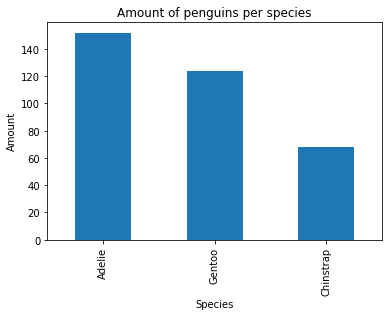

In [22]:
# create a bar plot of the amount of penguins per species
penguins['species'].value_counts().plot(kind='bar')

# add a title
plt.title('Amount of penguins per species')

# add an x-axis label
plt.xlabel('Species')

# add an y-axis label
plt.ylabel('Amount')

# display the plot
plt.show()

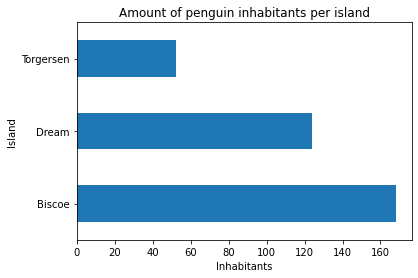

In [25]:
# create a bar plot of the amount of penguins living on each island
# note: we can use "barh" to create a horizontal bar plot. this would be
# especially useful if there were a lot of different islands
penguins['island'].value_counts().plot(kind='barh')

# add a title
plt.title('Amount of penguin inhabitants per island')

# add an x-axis label
plt.xlabel('Inhabitants')

# add an y-axis label
plt.ylabel('Island')

# display the plot
plt.show()

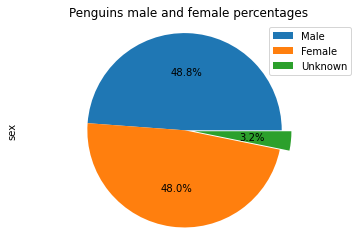

In [38]:
# create a pie chart plot to visualize the male to female ratio of the penguins
explode = (0, 0, 0.1)
penguins['sex'].value_counts(dropna=False).plot(kind='pie', labels=None, autopct='%1.1f%%', explode=explode)

# equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# add a title
plt.title('Penguins male and female percentages')

# add a legend
labels = ['Male', 'Female', 'Unknown']
plt.legend(labels=labels)

# display the plot
plt.show()